# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [1]:
# importing libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [5]:
# loading csv file
df = pd.read_csv('data/ames.csv', index_col=0)

The following code checks that you loaded the data correctly:

In [3]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [6]:
# previewing contents of dataframe
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# checking dataframe information & summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

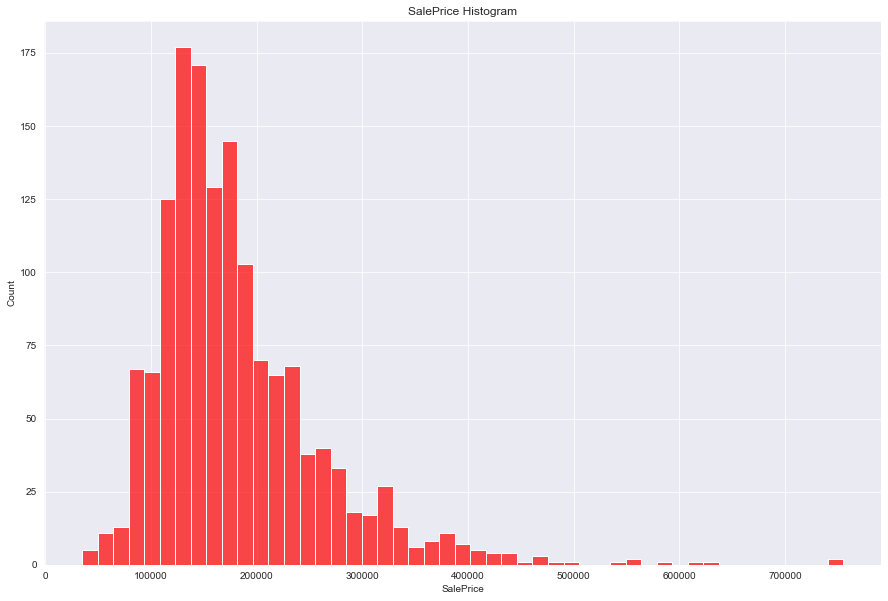

In [16]:
# finding information for SalePrice and assigning it to a variable:
sale_price = df.SalePrice

# plotting histogram for sale_price (with seaborn)
sns.set_style('darkgrid') #setting seaborn plotting style

fig, ax = plt.subplots(figsize=(15,10))
sns.histplot(data=sale_price, color='red', alpha=0.7).set(title='SalePrice Histogram');

Now, print out the mean, median, and standard deviation:

SalePrice mean is 180921.2
SalePrice median is 163000.0
SalePrice standard deviation is 79442.5


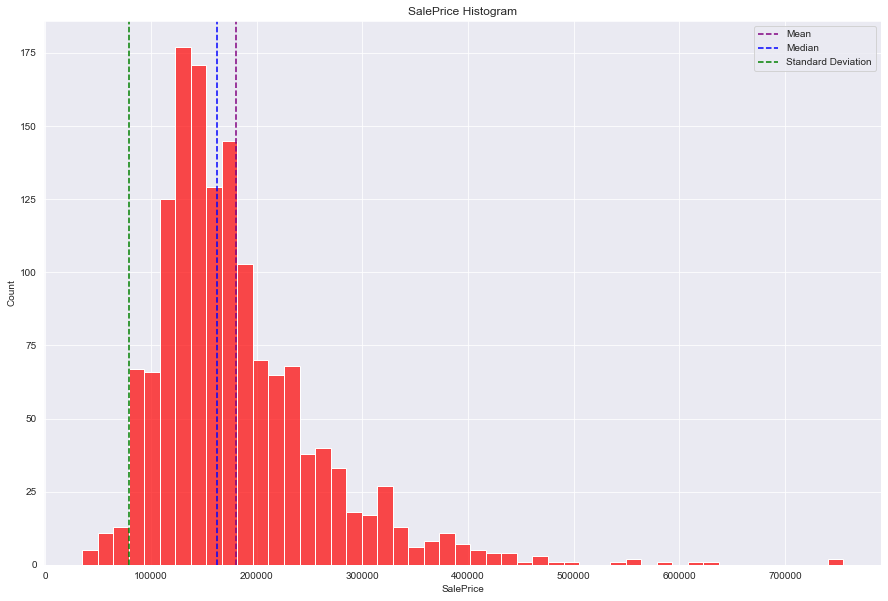

In [20]:
# printing out sale_price (mean, median, standard deviation)

print(f'SalePrice mean is {round(sale_price.mean(), 2)}')
print(f'SalePrice median is {round(sale_price.median(), 2)}')
print(f'SalePrice standard deviation is {round(sale_price.std(), 2)}')

# visualizng it on the histogram:
fig, ax = plt.subplots(figsize=(15,10))
sns.histplot(data=sale_price, color='red', alpha=0.7).set(title='SalePrice Histogram')

plt.axvline(sale_price.mean(), color='purple', linestyle='--', label='Mean')
plt.axvline(sale_price.median(), color='blue', linestyle='--', label='Median')
plt.axvline(sale_price.std(), color='green', linestyle='--', label='Standard Deviation')
plt.legend();

In the cell below, interpret the above information.

**Interpretation**

* As shown in the histogram above, the SalePrice skews towards the left. This means that majority of the houses are on the cheaper to moderate price point. There are a significant number of outliers signfies the large gap between home prices in Ames. The outliers results in the mean being slightly skewed more towards the right. 

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

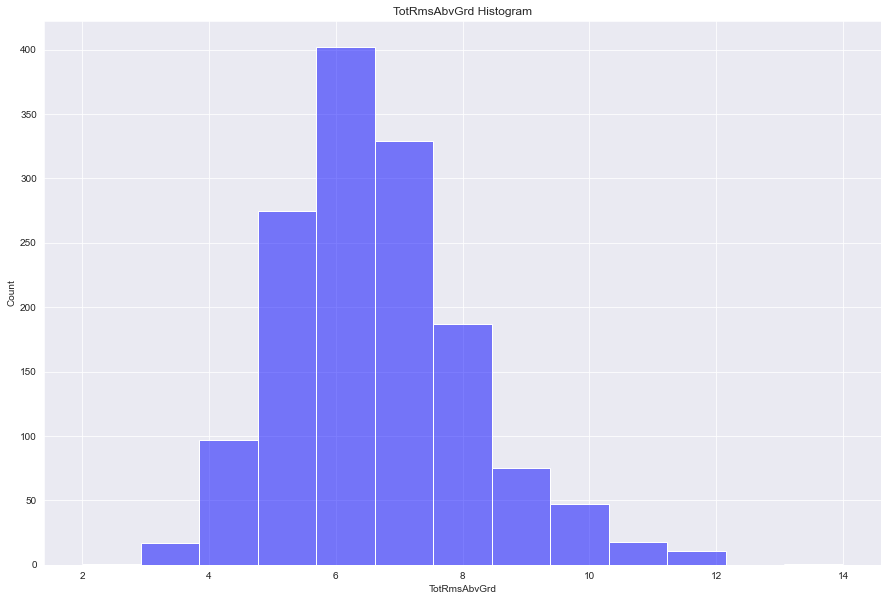

In [40]:
# getting information of the total rooms above grade and assigning it to a variable
tr_ag= df.TotRmsAbvGrd

# plotting histogram for total rooms above grade
fig, ax = plt.subplots(figsize=(15,10))
sns.histplot(data=tr_ag, bins=13, color='blue', alpha=0.5).set(title='TotRmsAbvGrd Histogram');

Now, print out the mean, median, and standard deviation:

TotRmsAbvGrd mean is 6.52
TotRmsAbvGrd median is 6.0
TotRmsAbvGrd standard deviation is 1.63


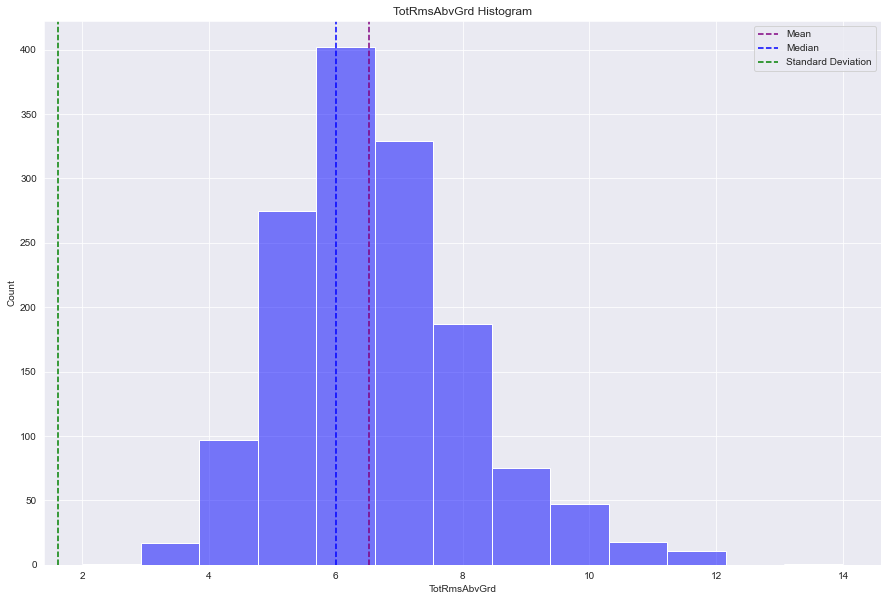

In [41]:
# printing out tr_ag (mean, median, standard deviation)

print(f'TotRmsAbvGrd mean is {round(tr_ag.mean(), 2)}')
print(f'TotRmsAbvGrd median is {round(tr_ag.median(), 2)}')
print(f'TotRmsAbvGrd standard deviation is {round(tr_ag.std(), 2)}')

# visualizng it on the histogram:
fig, ax = plt.subplots(figsize=(15,10))
sns.histplot(data=tr_ag, bins=13, color='blue', alpha=0.5).set(title='TotRmsAbvGrd Histogram')

plt.axvline(tr_ag.mean(), color='purple', linestyle='--', label='Mean')
plt.axvline(tr_ag.median(), color='blue', linestyle='--', label='Median')
plt.axvline(tr_ag.std(), color='green', linestyle='--', label='Standard Deviation')
plt.legend();

In the cell below, interpret the above information.

**Interpretation**

* The histogram above shows a normal/symmetric distribution of the total rooms above grade. The mean and median lie in the same range as the highest frequency of the total rooms above grade. The standard deviation is significantly small which infers that the majority total rooms that are above grade do not deviate largely from the mean.

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

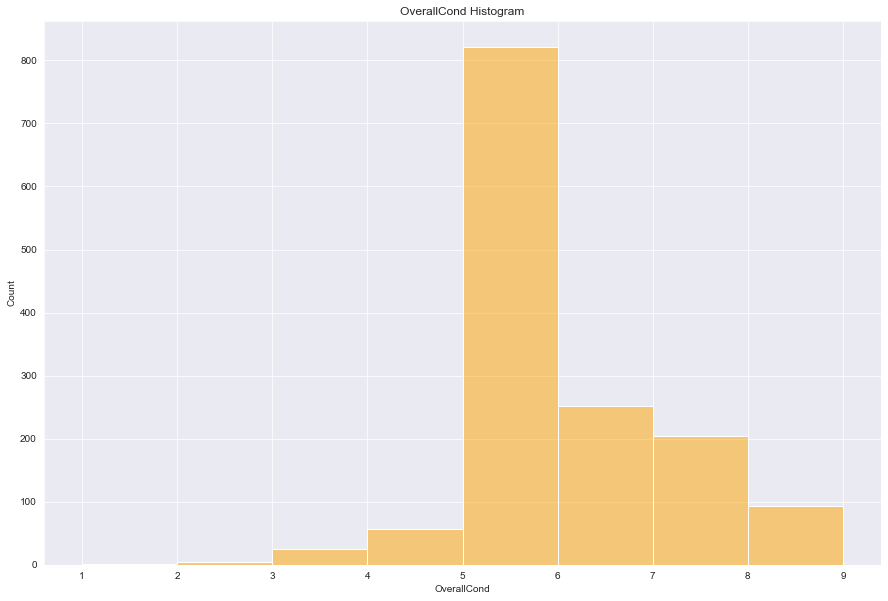

In [39]:
# getting information for overall condition and assign it to a variable:
ovcon = df.OverallCond

# plotting histogram for total rooms above grade
fig, ax = plt.subplots(figsize=(15,10))
sns.histplot(data=ovcon, bins=8, color='orange', alpha=0.5).set(title='OverallCond Histogram');

Now, print out the mean, median, and standard deviation:

OverallCond mean is 5.58
OverallCond median is 5.0
OverallCond standard deviation is 1.11


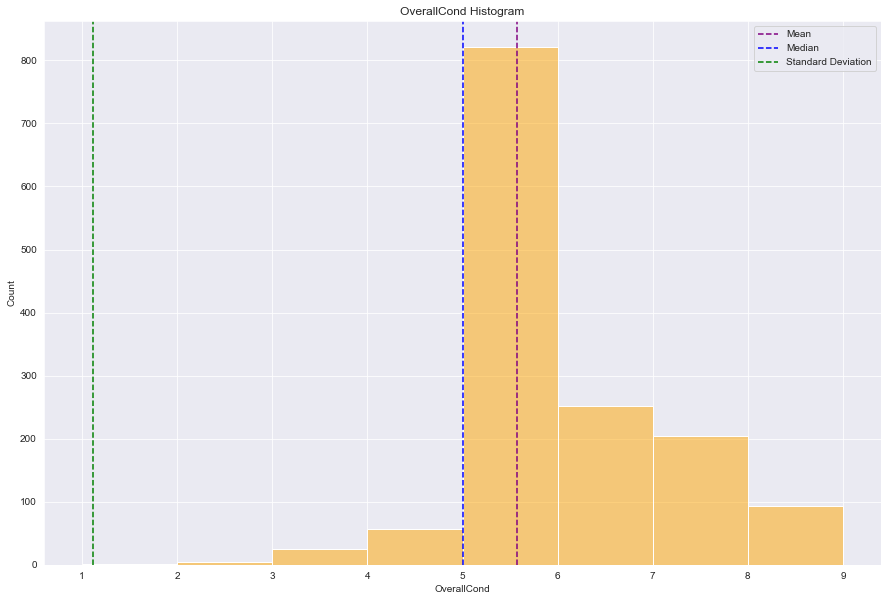

In [43]:
# printing out ovcon (mean, median, standard deviation)

print(f'OverallCond mean is {round(ovcon.mean(), 2)}')
print(f'OverallCond median is {round(ovcon.median(), 2)}')
print(f'OverallCond standard deviation is {round(ovcon.std(), 2)}')

# visualizng it on the histogram:
fig, ax = plt.subplots(figsize=(15,10))
sns.histplot(data=ovcon, bins=8, color='orange', alpha=0.5).set(title='OverallCond Histogram')

plt.axvline(ovcon.mean(), color='purple', linestyle='--', label='Mean')
plt.axvline(ovcon.median(), color='blue', linestyle='--', label='Median')
plt.axvline(ovcon.std(), color='green', linestyle='--', label='Standard Deviation')
plt.legend();

In the cell below, interpret the above information.

**Interpretation**

* The histogram shows that majority of the rooms in average to excellent conditions with most of the rooms being in average condition. The measures of central tendecy additionally shows that rooms tend to be in average condition with very few rooms being of poor condition

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [68]:
# record of conditions according to: less than 5, exactly 5, greater than 5
below_average_condition = df[df.OverallCond < 5]
average_condition = df[df.OverallCond == 5]
above_average_condition = df[df.OverallCond > 5]

The following code checks that you created the subsets correctly:

In [70]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

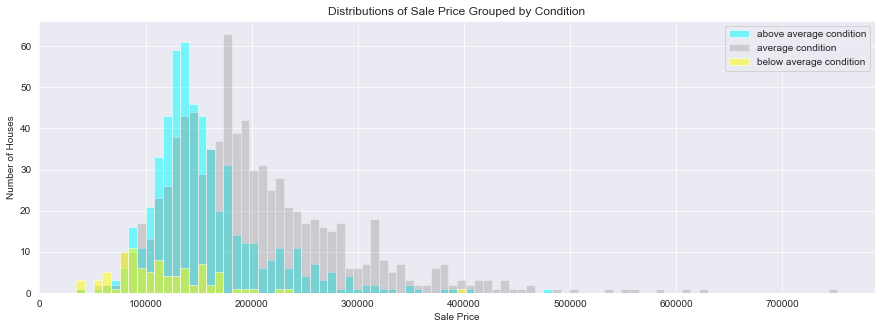

In [71]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

**Interpretation**

* You can infer from the plot above that majority of the houses in Ames are of average condition followed by those above average and lastly those below average. When observing the sale price for those above average condition and those in average condition, one can tell that surprsing houses that are above average condition go for cheaper than those at average condition. The cheapest houses are those that are below average condition.

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [94]:
#selecting columns with only numerical info
df_np = df.select_dtypes(include=np.number)

#confirming dtype
df_np.dtypes

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [123]:
pos_corr = df_np.corr()['SalePrice'].sort_values(ascending=False)[1:2]
round(pos_corr,2)

OverallQual    0.79
Name: SalePrice, dtype: float64

Now, find the ***most negatively correlated*** column:

In [121]:
most_neg = df_np.corr()['SalePrice'].sort_values(ascending=False)[-1:]
round(most_neg,2)

KitchenAbvGr   -0.14
Name: SalePrice, dtype: float64

Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

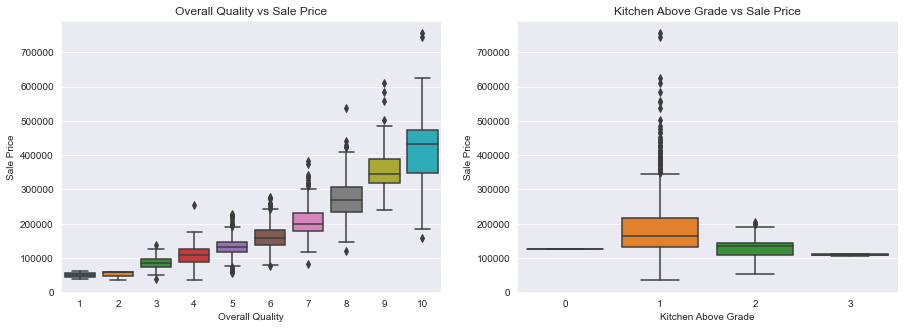

In [124]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df_np.OverallQual,
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df_np.KitchenAbvGr,
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title('Overall Quality vs Sale Price')
ax1.set_xlabel('Overall Quality')
ax1.set_ylabel("Sale Price")
ax2.set_title('Kitchen Above Grade vs Sale Price')
ax2.set_xlabel('Kitchen Above Grade')
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

**Interpretation**

* The first box plot show the sale price per quality of house and it is evident that the sale prices is significantly higher for house of excellent quality. This if further emphasised by the number of outliers above quailty 5. 
* The second box plot shows that kitchens that are above grade do not have a significant inverse effect in the sale price and the houses with the most significant sale prices belong to the single kitchens with a many outliers.

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [125]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

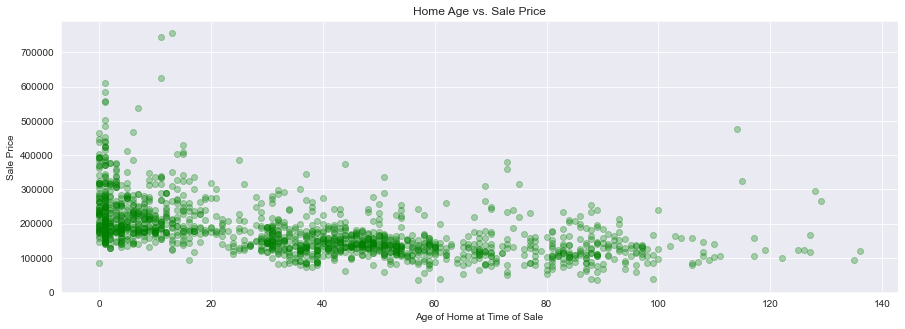

In [126]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

**Interpretation**

The scatter plot shoes that majority of the houses sold are between 0-20 years old as shown by the immense cluster. Houses in that age range have the highest sale prices. As the houses age,the depreciate in monetary values and have a lower sale price.

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset. You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.